In [71]:
library(caTools)
library(ggplot2)
library(plyr)
library(MASS)
library(e1071)
library(caret)

Loading required package: lattice


In [72]:
glass_data <- read.csv("datasets/glass.csv", header = TRUE)

In [73]:
head(glass_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [74]:
# The data file doesn't have headers. So read the column names into a vector and add column names to the glass dataset.
header <- c("Id", "Refractive_Index","Sodium","Magnesium","Aluminium","Silicon","Potassium","Calcium","Barium","Iron","Type")
names(glass_data) <- header
glass_data$Id <- NULL

In [75]:
head(glass_data)

Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


## We're trying to predict Type

In [76]:
# Convert Type variable to factor type. 
glass_data$Type <- as.factor(glass_data$Type)
str(glass_data)

'data.frame':	214 obs. of  10 variables:
 $ Refractive_Index: num  1.52 1.52 1.52 1.52 1.52 ...
 $ Sodium          : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Magnesium       : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Aluminium       : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Silicon         : num  71.8 72.7 73 72.6 73.1 ...
 $ Potassium       : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Calcium         : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Barium          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Iron            : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type            : Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


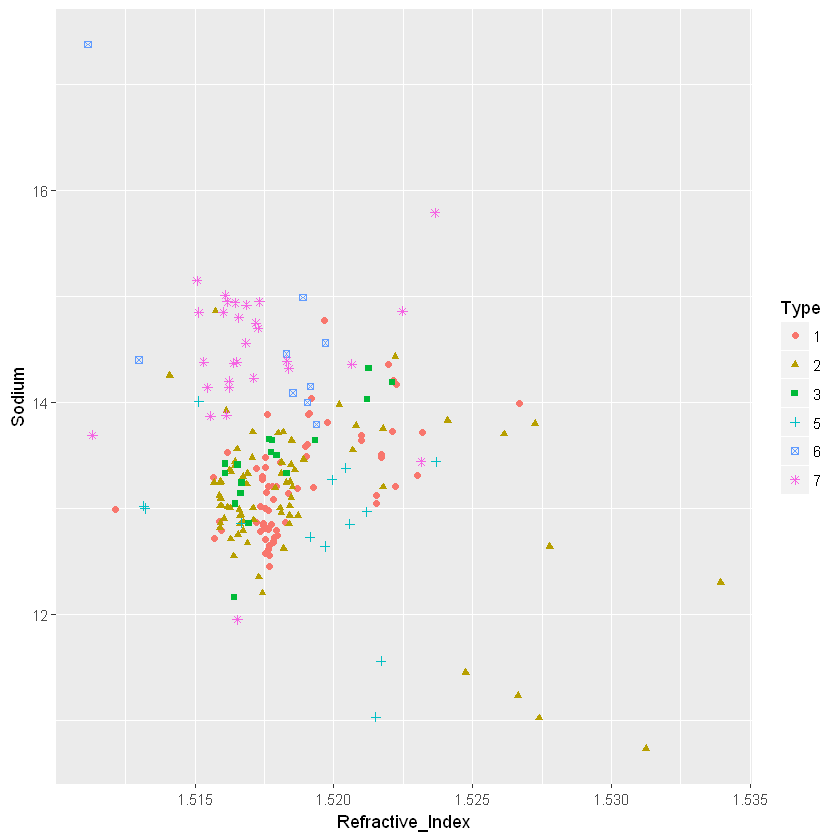

In [77]:
glassPlot <- ggplot(glass_data, aes(x = Refractive_Index, y = Sodium)) + 
    geom_point(aes(color = Type, shape = Type))

glassPlot

In [78]:
set.seed(123) # set.seed() will help us to reproduce the results.

split <- sample.split(glass_data$Type, SplitRatio = 0.70)

# Train data will have the rest 70% of data
glass_train_data  = subset(glass_data, split == TRUE)
# Test data will have the rest 30% of data
glass_test_data  = subset(glass_data, split == FALSE)

In [79]:
dim(glass_data)

[1] 214  10

In [80]:
dim(glass_train_data)

[1] 149  10

In [81]:
dim(glass_test_data)

[1] 65 10

# LDA Model

In [82]:
glass_lda_fit <- lda(Type ~., data = glass_train_data)

glass_lda_fit

Call:
lda(Type ~ ., data = glass_train_data)

Prior probabilities of groups:
         1          2          3          5          6          7 
0.32885906 0.35570470 0.08053691 0.06040268 0.04026846 0.13422819 

Group means:
  Refractive_Index   Sodium Magnesium Aluminium  Silicon Potassium   Calcium
1         1.518846 13.29082 3.5585714  1.135714 72.56286 0.4244898  8.843265
2         1.518238 13.12962 3.0492453  1.402264 72.70717 0.5250943  8.934151
3         1.517943 13.51667 3.5633333  1.131667 72.44750 0.3691667  8.801667
5         1.518926 12.94444 0.7488889  2.032222 72.46556 1.2477778 10.095556
6         1.517777 14.80167 1.2950000  1.175000 73.19833 0.0000000  9.413333
7         1.516588 14.44150 0.5790000  2.200500 73.03700 0.2810000  8.334000
      Barium       Iron
1 0.01591837 0.05551020
2 0.01264151 0.07415094
3 0.01250000 0.03583333
5 0.24444444 0.03111111
6 0.00000000 0.00000000
7 1.05200000 0.00750000

Coefficients of linear discriminants:
                          LD1

In [83]:
# give the counts for each class in the data

glass_lda_fit$count

1  2  3  5  6  7 
49 53 12  9  6 20

In [84]:
# the singular values (svd) gives the ratio of the between and within-group standard deviations of the linear 
# discriminant variables.

glass_lda_fit$svd

[1] 12.049713  4.859151  2.926234  2.121175  1.258174

In [85]:
# normalized proportions.
prop = glass_lda_fit$svd^2/sum(glass_lda_fit$svd^2)
prop

# Based on values displayed below, 1st LDA can explain more than 79% percent 
# of between-group variance in this dataset.

[1] 0.791462917 0.128705759 0.046676174 0.024526191 0.008628959

In [86]:
pred <- predict(glass_lda_fit, glass_test_data)
ldaClass <- pred$class
ldaClass

[1] 1 2 1 1 2 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2 2 1 2 2 1 1 5 7 5 1 2 2 2 2 5
[39] 1 2 1 2 2 1 2 2 1 1 2 2 5 5 5 6 6 5 2 7 7 7 7 7 5 7 7
Levels: 1 2 3 5 6 7

In [87]:
confusion <- table(ldaClass, glass_test_data$Type)
confusion

        
ldaClass  1  2  3  5  6  7
       1 15  7  2  0  0  0
       2  6 12  3  1  0  1
       3  0  0  0  0  0  0
       5  0  3  0  3  1  1
       6  0  0  0  0  2  0
       7  0  1  0  0  0  7

In [88]:
paste("Accuracy:", sum(diag(confusion)) / length(glass_test_data$Type))

[1] "Accuracy: 0.6"

### LDA did a poor job :( Let's try SVM

In [89]:
tctrl <- tune.control(sampling = "cross",
                         cross = 10,
                         best.model = TRUE,
                         performances = TRUE)

In [90]:
tuned_params_cv <- tune(svm, Type ~. ,
                           data = glass_data,
                           kernel = "radial", 
                           ranges = list(gamma = 10^(-6:-1), cost=10^(0:2)), 
                           tunecontrol = tctrl)

summary(tuned_params_cv)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 0.2891775 

- Detailed performance results:
   gamma cost     error dispersion
1  1e-06    1 0.6441558 0.07383459
2  1e-05    1 0.6441558 0.07383459
3  1e-04    1 0.6441558 0.07383459
4  1e-03    1 0.6396104 0.06602619
5  1e-02    1 0.4573593 0.07511270
6  1e-01    1 0.2891775 0.06597058
7  1e-06   10 0.6441558 0.07383459
8  1e-05   10 0.6441558 0.07383459
9  1e-04   10 0.6396104 0.06602619
10 1e-03   10 0.4625541 0.07423433
11 1e-02   10 0.3545455 0.06255707
12 1e-01   10 0.3359307 0.06521345
13 1e-06  100 0.6441558 0.07383459
14 1e-05  100 0.6396104 0.06602619
15 1e-04  100 0.4625541 0.07423433
16 1e-03  100 0.3636364 0.07701492
17 1e-02  100 0.3034632 0.04233925
18 1e-01  100 0.3309524 0.07614106


In [91]:
names(tuned_params_cv)

[1] "best.parameters"  "best.performance" "method"           "nparcomb"        
[5] "train.ind"        "sampling"         "performances"     "best.model"

In [92]:
tuned_params_cv["best.parameters"]

,gamma,cost
6,0.1,1


In [93]:
# using the best params

glass_svm_fit <- svm(Type ~. ,
                        data = glass_train_data,
                        gamma = 0.1, 
                        cost = 1,
                        scale = FALSE)

summary(glass_svm_fit)


Call:
svm(formula = Type ~ ., data = glass_train_data, gamma = 0.1, cost = 1, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  129

 ( 44 48 12 8 6 11 )


Number of Classes:  6 

Levels: 
 1 2 3 5 6 7




In [94]:
predTest <- predict(glass_svm_fit, glass_test_data[,-10])
predTest[0:10]

2  4  5  8 11 16 20 21 24 31 
 2  2  2  2  2  2  2  2  1  1 
Levels: 1 2 3 5 6 7

In [95]:
confusionMatrix(predTest, glass_test_data$Type)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  5  6  7
         1 11  4  3  0  0  0
         2 10 18  2  1  2  2
         3  0  0  0  0  0  0
         5  0  1  0  3  1  1
         6  0  0  0  0  0  0
         7  0  0  0  0  0  6

Overall Statistics
                                          
               Accuracy : 0.5846          
                 95% CI : (0.4556, 0.7056)
    No Information Rate : 0.3538          
    P-Value [Acc > NIR] : 0.0001239       
                                          
                  Kappa : 0.4079          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 5 Class: 6 Class: 7
Sensitivity            0.5238   0.7826  0.00000  0.75000  0.00000  0.66667
Specificity            0.8409   0.5952  1.00000  0.95082  1.00000  1.00000
Pos Pred Value         0.6111   0.5143      NaN  0.50000      NaN  1.00000
Neg Pred Value         0.7872   0.8333  0.92308  0.98305 